# 分类模型

In [22]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits,load_boston

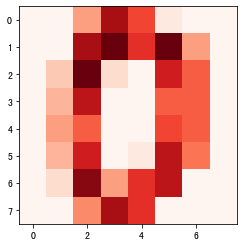

In [14]:
data=load_digits()
plt.imshow(data.images[0],cmap='Reds',interpolation='nearest')

In [16]:
sample=data.data
target=data.target

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

X_train,X_test,Y_train,Y_test=train_test_split(sample,target,test_size=1/3)

clf1=DecisionTreeClassifier()
clf1.fit(X_train,Y_train)
clf1.predict(X_test)

clf1.score(X_test,Y_test)

clf2=RandomForestClassifier()
clf2.fit(X_train,Y_train)
clf2.predict(X_test)
clf2.score(X_test,Y_test)


clf3=SVC()
clf3.fit(X_train,Y_train)
clf3.predict(X_test)
clf3.score(X_test,Y_test)

0.989983305509182

# 回归模型

In [23]:
boston=load_boston()

# Pipeline(estimator 串联)

In [25]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import ElasticNetCV,LassoCV,RidgeCV
from sklearn.pipeline import Pipeline

In [34]:
boston=datasets.load_boston()
X_train,X_test,Y_train,Y_test=train_test_split(boston.data,boston.target,test_size=1/3,random_state=1)

pipe=Pipeline([
    ('scaler',MinMaxScaler()),
    ('pca',PCA()),
    ('net',ElasticNetCV())
])

pipe.set_params(scaler__feature_range=(0,1),pca__n_components=6)

pipe.fit(X_train,Y_train)
print(pipe.predict(X_test))
print(pipe.score(X_test,Y_test))
print(pipe.get_params())

[27.58466991 26.80314003 18.64361545 23.97284585 19.55623809 18.16741981
 26.6712391  17.64453401 24.1859656  26.40420661 24.92875992 29.27581457
 21.78758793 24.3932496  21.85983396 18.5696831  16.9772845  35.29823577
 28.06254163 13.91371147 21.15204922 19.55392322 24.46702233 25.9698006
 28.96550539 10.40309712 13.30491159 22.14315104 35.30277632 14.63511308
 25.25660009 16.01193498 36.38847898 19.08193419 26.6491292  21.98086091
 18.19475897 29.0278856   9.14337642 19.51602079 28.86336438 24.54103083
 27.78729735 14.28056299 17.87006972 15.27943324 38.1312142  18.14254733
 24.42433674 17.79524366 24.30704557 25.07025721 26.75730011 25.00431986
  5.36970024 23.93342419 12.01420987 26.28611198 17.43891404 34.41510181
 19.42201088 27.21703795 16.1222338  16.03685391 13.8167602  30.59736556
 35.2573349  28.09629871 25.49582399 24.41595775 25.85882558  8.49760283
 16.18250487 20.431517   18.72907716 21.93228892 31.45506906 28.27013351
 28.33858583 28.56990119 16.61907718 23.54746328 32.

# 特征联合(estimator 并联)

In [35]:
from sklearn import datasets
from sklearn.pipeline import FeatureUnion
from sklearn.decomposition import PCA,KernelPCA

In [36]:
boston=datasets.load_boston()

united=FeatureUnion([
    ('Linear_pca',PCA(n_components=3)),
    ('KernelPCA',KernelPCA(n_components=5))
])
united.fit_transform(boston.data).shape

(506, 8)